              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  
Missing values by column:
 area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64
Data Informati

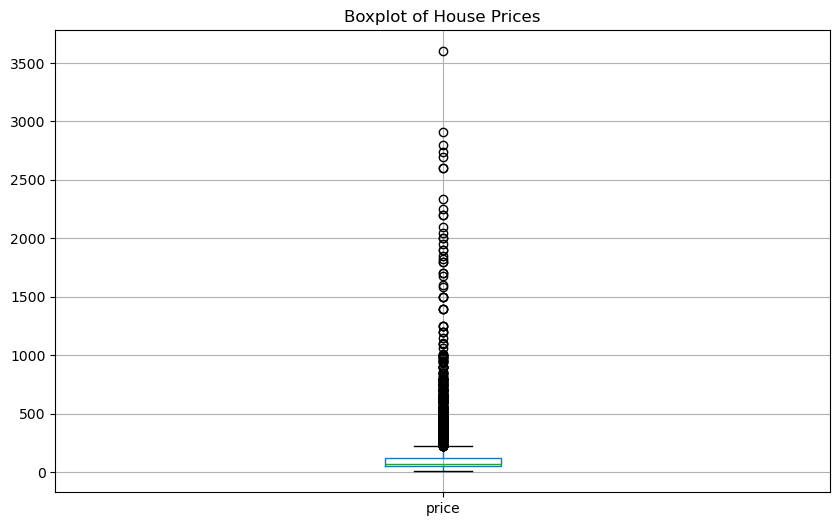

Data after removing outliers:
               area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  
DataFrame Columns:
 Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')
Data Types:
 area_type        object
availability    

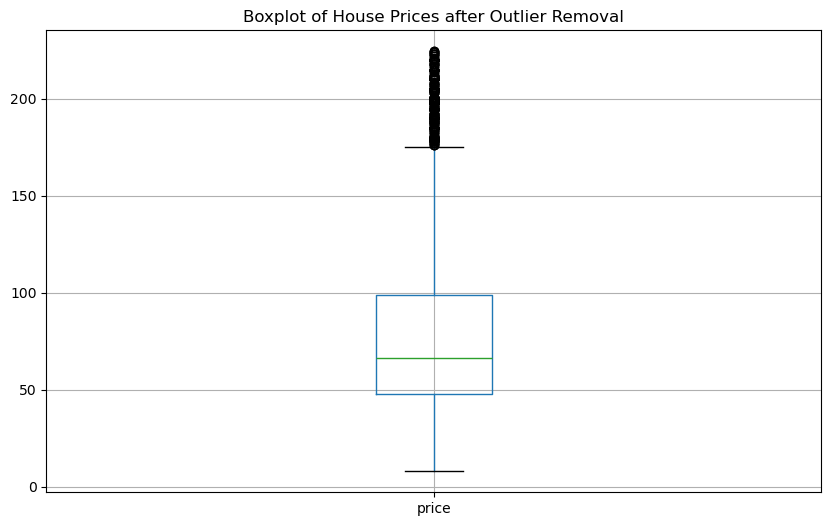

Data after Label Encoding:
               area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


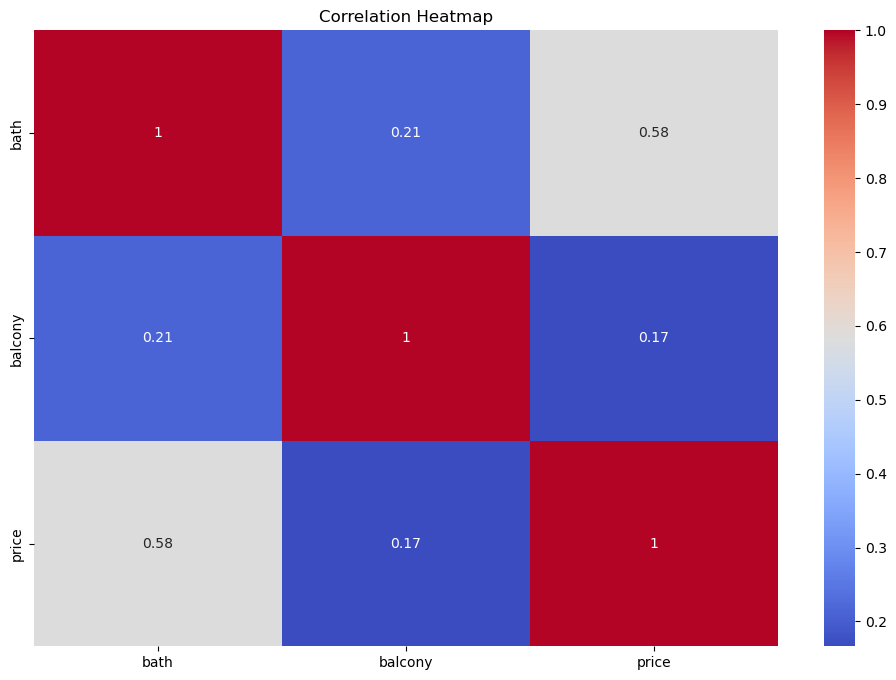

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_csv("Bengaluru_House_Data.csv")

# Display the first few rows
print(df.head())

# Check for missing values
print("Missing values by column:\n", df.isna().sum())

# Display data types and information
print("Data Information:\n")
df.info()

# Summary statistics
print("Summary Statistics:\n", df.describe())

# Initial boxplot to visualize outliers in the 'price' column
plt.figure(figsize=(10, 6))
df.boxplot(column=['price'])
plt.title('Boxplot of House Prices')
plt.show()

# Remove outliers from the 'price' column using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
iqr = Q3 - Q1
minm = Q1 - (1.5 * iqr)
maxm = Q3 + (1.5 * iqr)
df = df[(df['price'] > minm) & (df['price'] < maxm)]
print("Data after removing outliers:\n", df.head())

# Display column names and data types
print("DataFrame Columns:\n", df.columns)
print("Data Types:\n", df.dtypes)

# Boxplot after outlier removal
plt.figure(figsize=(10, 6))
df.boxplot(column=['price'])
plt.title('Boxplot of House Prices after Outlier Removal')
plt.show()

# Label Encoding for categorical columns
le = LabelEncoder()
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus', 'prefarea']
for col in categorical_columns:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])
print("Data after Label Encoding:\n", df.head())

# Ensure only numeric columns are used for correlation
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data=numeric_df.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()
